In [1]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [2]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import connect_to_db as cn
from matplotlib.ticker import MaxNLocator
import scipy.stats

In [17]:
# Font 설정.
plt.rcParams.update({'font.family':'Arial'})

In [18]:
plt.rcParams['pdf.fonttype'] = 42 # TrueType
plt.rcParams['ps.fonttype'] = 42 

In [6]:
def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [7]:
def draw_multiple_cdf_normalize_y(np_result_list, title, colors, xlabel, legends, linestyles, log_scale, only_integer=False):
    if log_scale:
        title = title + '_log_scale'
    filename = title + '.eps'
    
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    
    for np_result, color, legend, linestyle in zip(np_result_list, colors, legends, linestyles):
        sorted_data = np.sort(np_result)
        if legend == 'no legend':
            plt.step(sorted_data, normalization(np.arange(sorted_data.size)), color=color, linestyle=linestyle, linewidth=7)
        else:
            plt.step(sorted_data, normalization(np.arange(sorted_data.size)), label=legend, color=color, linestyle=linestyle, linewidth=7)
        if log_scale:
            plt.xscale('symlog')
            
        ax.spines['right'].set_color('black')
        ax.spines['top'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
        
        if only_integer:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  
    if legend != 'no legend':
        plt.legend(prop={'size': 48 }, loc = 'lower right', framealpha=1, edgecolor='0')

    plt.xticks(fontsize=36)
    plt.yticks(fontsize=36)
    
    plt.savefig(f"../figure/eps/{filename}", bbox_inches='tight', format='eps')
    plt.show()

In [22]:
sql = 'select * from mentor;'
result_df = cn.select_query_result_to_df(sql)
result_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_________________UWU,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
1,______________Blank,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
2,_________-----------,1,1,3.00000000,1.00000000,None,None,0E-8,0E-8,1.00000
3,_________ez_________,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
4,_______woohoo,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,3.00000
...,...,...,...,...,...,...,...,...,...,...
461352,Zzzzz315,1,1,1.00000000,3.00000000,None,None,0E-8,0E-8,1.00000
461353,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
461354,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000
461355,zzzzzzz____,2,2,1.00000000,2.00000000,0.23076793,0E-8,0E-8,0E-8,1.50000


In [9]:
sql2 = 'select * from mentor where comments_similarity >= 0;'
result_df2 = cn.select_query_result_to_df(sql2)
result_df2

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_______ZERO,10,10,1.10000000,2.20000000,0.09195855,0.05160771,0.29590327,0.81734542,6.60000
1,______V______,6,6,1.33333333,2.66666667,0.10136209,0.04694719,0.57938016,0.57938016,1.16667
2,_____0_,2,2,1.00000000,2.50000000,0.07903821,0.03580134,0E-8,0.63092975,2.50000
3,_____boop,7,7,1.28571429,2.85714286,0.15010499,0.02310080,0.54456845,0.37330396,1.71429
4,_____els3sle-,8,7,1.25000000,1.87500000,0.13326611,0.04322288,0.51185951,0.88685951,2.00000
...,...,...,...,...,...,...,...,...,...,...
224401,ZzzzoZzzzo,3,3,1.66666667,1.33333333,0.12780807,0.13645193,0.57938016,0.57938016,2.33333
224402,zzzztheday,11,11,1.54545455,2.18181818,0.11286962,0.03088349,0.82607422,0.94318878,3.36364
224403,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
224404,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000


In [10]:
sql3 = 'select * from mentor where posts_similarity >= 0;'
result_df3 = cn.select_query_result_to_df(sql3)
result_df3

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_______ZERO,10,10,1.10000000,2.20000000,0.09195855,0.05160771,0.29590327,0.81734542,6.60000
1,______V______,6,6,1.33333333,2.66666667,0.10136209,0.04694719,0.57938016,0.57938016,1.16667
2,_____0_,2,2,1.00000000,2.50000000,0.07903821,0.03580134,0E-8,0.63092975,2.50000
3,_____boop,7,7,1.28571429,2.85714286,0.15010499,0.02310080,0.54456845,0.37330396,1.71429
4,_____els3sle-,8,7,1.25000000,1.87500000,0.13326611,0.04322288,0.51185951,0.88685951,2.00000
...,...,...,...,...,...,...,...,...,...,...
220836,ZzzzoZzzzo,3,3,1.66666667,1.33333333,0.12780807,0.13645193,0.57938016,0.57938016,2.33333
220837,zzzztheday,11,11,1.54545455,2.18181818,0.11286962,0.03088349,0.82607422,0.94318878,3.36364
220838,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
220839,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000


In [31]:
result_df4 = pd.read_csv('../similarity/csv/random_similarity_2.csv')
print(result_df4)

     random_comments_similarity  random_posts_similarity
0                      0.000000                 0.000000
1                      0.170055                 0.000000
2                      0.072244                 0.000000
3                      0.033894                 0.078745
4                      0.071075                 0.000000
..                          ...                      ...
995                    0.199084                 0.000000
996                    0.084693                 0.000000
997                    0.079526                 0.000000
998                    0.000000                 0.059930
999                    0.181773                 0.000000

[1000 rows x 2 columns]


In [12]:
random = list(np.array(result_df4['random_posts_similarity'].tolist()))
zero_count = 0
for element in random:
    if element == 0:
        zero_count += 1
print(zero_count)
print(zero_count / len(random))

730
0.73


In [45]:
subreddit_df = pd.read_csv('../subreddit/csv/subreddit_analysis.csv')
print(subreddit_df)

       community_id  subreddits  subreddit_entropy
0              9062           2           0.970951
1              9874           1           0.000000
2             15712           1           0.000000
3             10787           1           0.000000
4             11783           1           0.000000
...             ...         ...                ...
21365         12120           1           0.000000
21366         20177           1           0.000000
21367          7281           1           0.000000
21368          8222           1           0.000000
21369          2515           1           0.000000

[21370 rows x 3 columns]


# CDF for paper without title, x and y labels

In [14]:
colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']

### The distribution of the number of the supporters in a support-seeking post

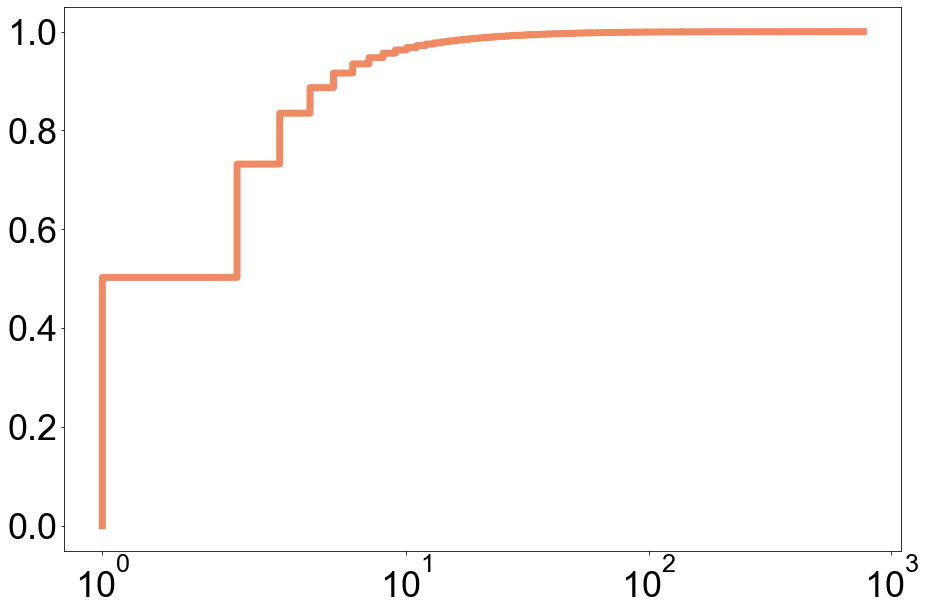

In [20]:
sql = "select p.post_key, count(distinct c.author) from posts p inner join comments c on p.post_key = c.link_key where c.is_valid=1 and c.is_valid_author=1 and p.is_valid_author=1 and c.link_key=c.parent_key group by p.post_key;"
result_df = cn.select_query_result_to_df(sql)
np_result = np.array(result_df['count(distinct c.author)'].tolist())
np_result_list = []
np_result_list.append(np_result)

draw_multiple_cdf_normalize_y(np_result_list, "cdf_supporters", colors, '# Comments', legends, linestyles, True)

### The distribution of the number of comments made by a supporter

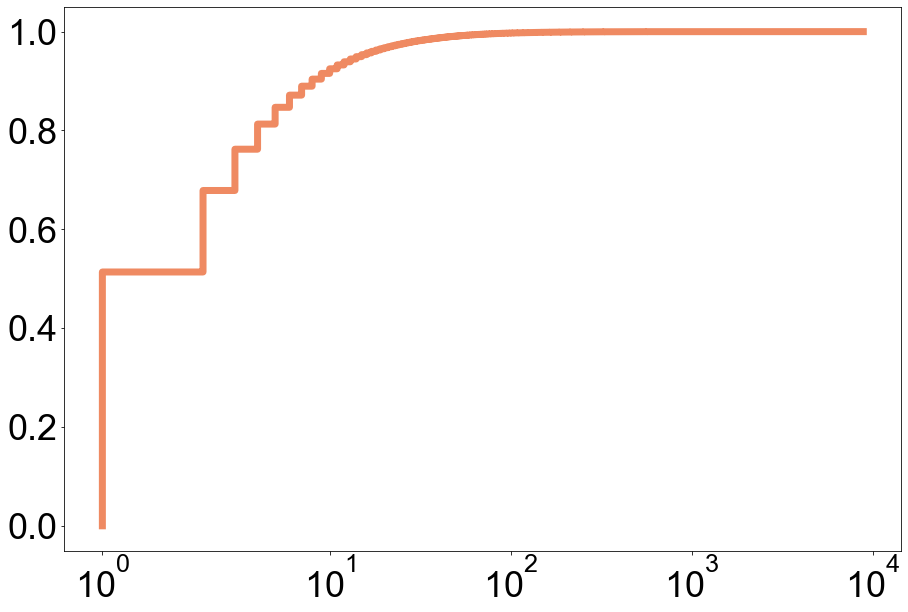

In [23]:
np_result = np.array(result_df['comment_cnt'].tolist())
np_result_list = []
np_result_list.append(np_result)
draw_multiple_cdf_normalize_y(np_result_list, "cdf_users_comments_count", colors, '# Comments', legends, linestyles, True)

### The distribution of entropy of subreddit by community with three or more users

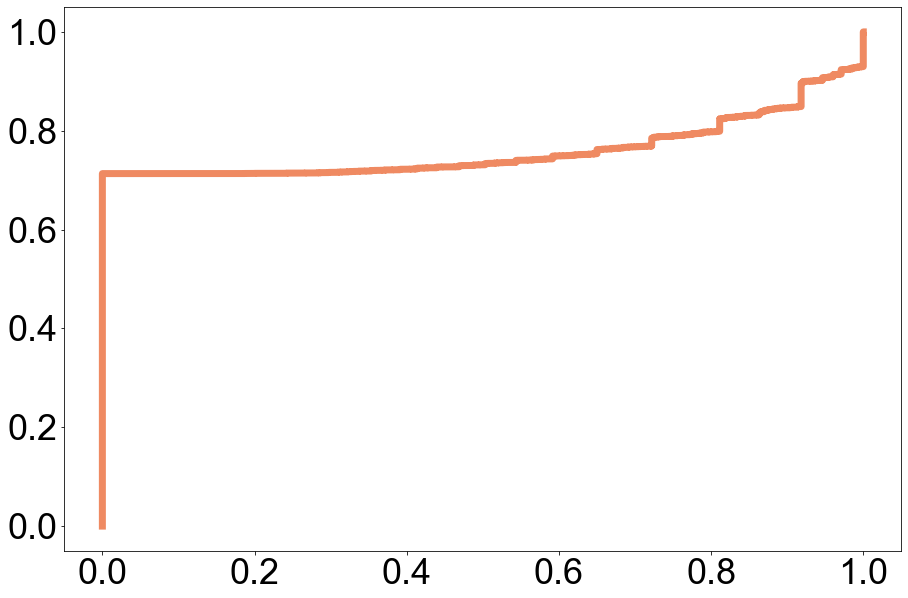

In [48]:
np_result_list6 = []
subreddits_3_entropy = []
for i in range(len(subreddit_df)):
    if subreddit_df.loc[i]['community_id'] in community_3_list:
        subreddits_3_entropy.append(subreddit_df.loc[i]['subreddit_entropy'])
np_result_list6.append(subreddits_3_entropy)        

colors = ['#ef8a62']
legends = ['no legend']
linestyles = ['-']

draw_multiple_cdf_normalize_y(np_result_list6, "cdf_entropy_of_subreddit_by_community", colors, 'entropy', legends, linestyles, False)

In [35]:
colors = ['#ef8a62', '#67a9cf']
linestyles = ['-', '--']

# Statistical Test

In [25]:
def statistical_test_with_result_list(result_list, figure_name, mode):
    if mode == 't':
        stat, pvalue = scipy.stats.ttest_ind(result_list[0], result_list[1], equal_var=False)
    else:
        stat, pvalue = scipy.stats.f_oneway(result_list[0], result_list[1])
        
    return [figure_name, np.mean(result_list[0]), np.mean(result_list[1]), stat, pvalue]

In [26]:
t_test_result = []

# Fig 2.

In [24]:
np_result_list2 = []

results = pd.DataFrame(result_df2['comments_similarity'])
# decimal을 float형으로 형 변환.
results = results.apply(pd.to_numeric, downcast='float')
np_result_list2.append(list(np.array(results['comments_similarity'].tolist())))
np_result_list2.append(np.array(result_df4['random_comments_similarity'].tolist()))

t_test_result.append(statistical_test_with_result_list(np_result_list2, 'fig_2_a_tf_idf_titles_of_participating_posts', 't'))

NameError: name 't_test_result' is not defined

In [24]:
np_result_list3 = []

results = pd.DataFrame(result_df3['posts_similarity'])
# decimal을 float형으로 형 변환.
results = results.apply(pd.to_numeric, downcast='float')
np_result_list3.append(list(np.array(results['posts_similarity'].tolist())))
np_result_list3.append(np.array(result_df4['random_posts_similarity'].tolist()))

t_test_result.append(statistical_test_with_result_list(np_result_list3, 'fig_2_b_tf_idf_comment_texts', 't'))

# Fig 3.

In [27]:
np_result_list4 = []

results = pd.DataFrame(result_df['average_is_score'])
results = results.apply(pd.to_numeric, downcast='float')
np_result_list4.append(list(np.array(results['average_is_score'].tolist())))

results = pd.DataFrame(result_df['average_es_score'])
results = results.apply(pd.to_numeric, downcast='float')
np_result_list4.append(list(np.array(results['average_es_score'].tolist())))

t_test_result.append(statistical_test_with_result_list(np_result_list4, 'fig_3_a_average_is_es_scores', 't'))

In [28]:
t_test_result

[['fig_2_a_tf_idf_titles_of_participating_posts',
  0.13179421251957746,
  0.08953979479648146,
  15.745237379663802,
  3.9081831788684585e-50],
 ['fig_2_b_tf_idf_comment_texts',
  0.032331562362030046,
  0.020694933232061945,
  8.995333766752148,
  1.1409665260952361e-18],
 ['fig_3_a_average_is_es_scores',
  1.3958346549794944,
  2.031000683935516,
  -503.23030373873917,
  0.0]]

In [28]:
header = ['figure_info', 'mean_of_orange_cdf', 'mean_of_blue_cdf', 't-statistics', 'p-value']
t_test_df = pd.DataFrame(t_test_result, columns = header)
t_test_df.to_csv(f"../figure/csv/t_test_result_section_4.csv", header=header, index=None)

### The distributions of the TF-IDF similarity scores among the titles of the participating posts

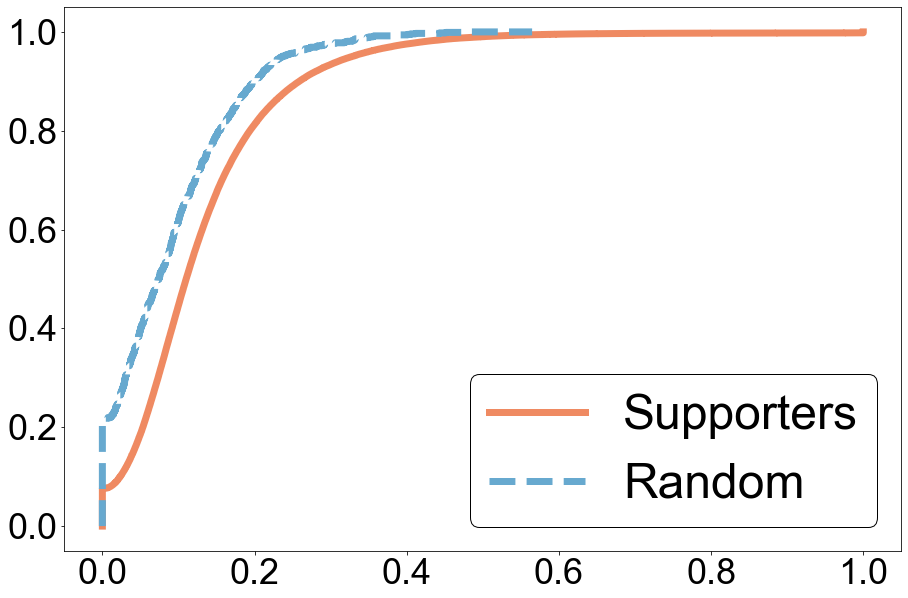

In [36]:
np_result_list2 = []
np_result_list2.append(np.array(result_df2['comments_similarity'].tolist()))
np_result_list2.append(np.array(result_df4['random_comments_similarity'].tolist()))
legends = ['Supporters', 'Random']

draw_multiple_cdf_normalize_y(np_result_list2, 'cdf_comments_similarity_by_mentor_with_null_model', colors, 'Similarity', legends, linestyles, False)

### The distributions of the TF-IDF similarity scores among the comment texts

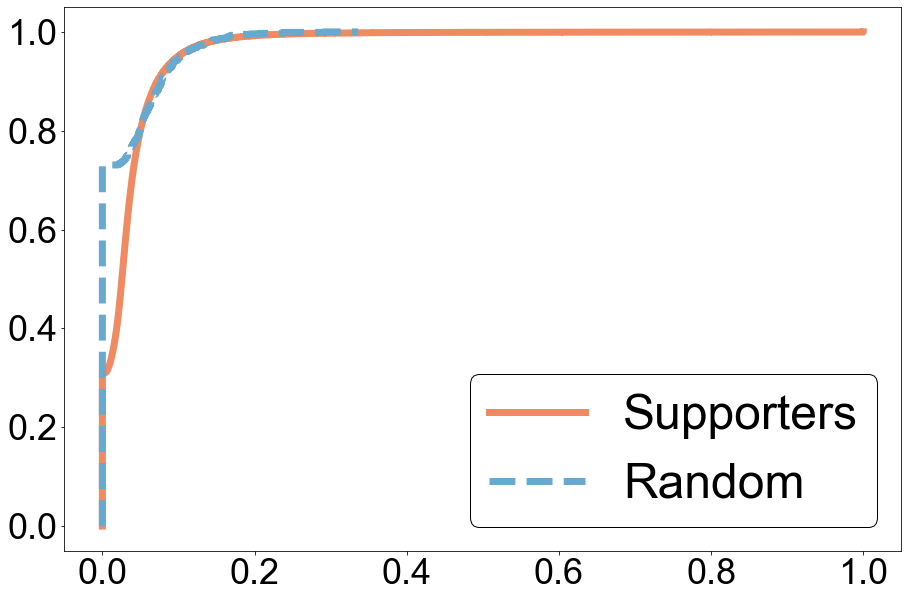

In [37]:
np_result_list3 = []
np_result_list3.append(np.array(result_df3['posts_similarity'].tolist()))
np_result_list3.append(np.array(result_df4['random_posts_similarity'].tolist()))
legends = ['Supporters', 'Random']

draw_multiple_cdf_normalize_y(np_result_list3, 'cdf_posts_similarity_by_mentor_with_null_model', colors, 'Similarity', legends, linestyles, False)

### The distribution of the average IS/ES scores for the supporters

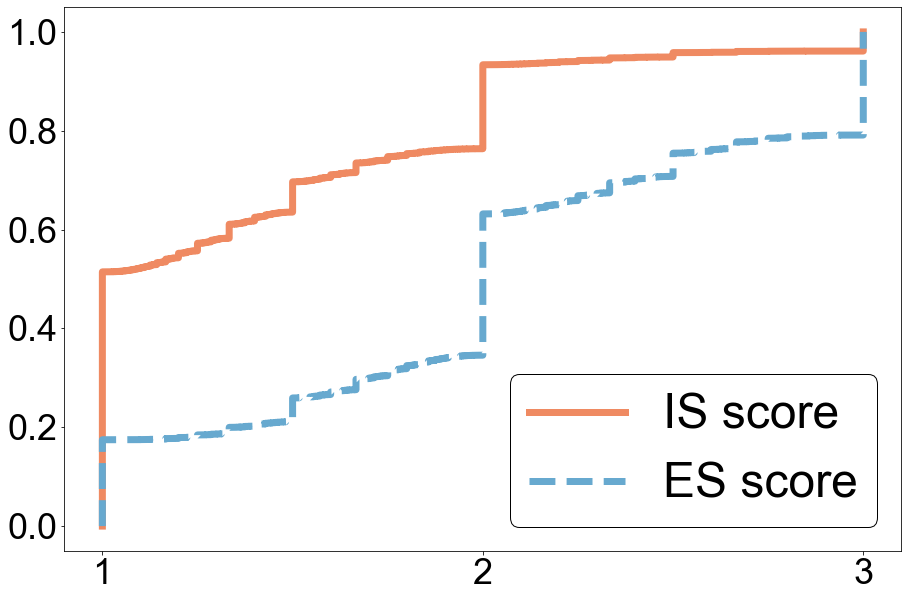

In [38]:
np_result_list4 = []
np_result_list4.append(np.array(result_df['average_is_score'].tolist()))
np_result_list4.append(np.array(result_df['average_es_score'].tolist()))
legends = ['IS score', 'ES score']

draw_multiple_cdf_normalize_y(np_result_list4, "cdf_average_is_es_scores", colors, 'Average score', legends, linestyles, False, True)

In [40]:
sql = 'select community_id_fastgreedy_is, count(*) from nodes group by community_id_fastgreedy_is having count(*) >= 3;'
community_3_df = cn.select_query_result_to_df(sql)
community_3_list = list(np.array(community_3_df['community_id_fastgreedy_is'].tolist()))

### The distributions of the number of subreddit by all communities and communities with 3 or more users

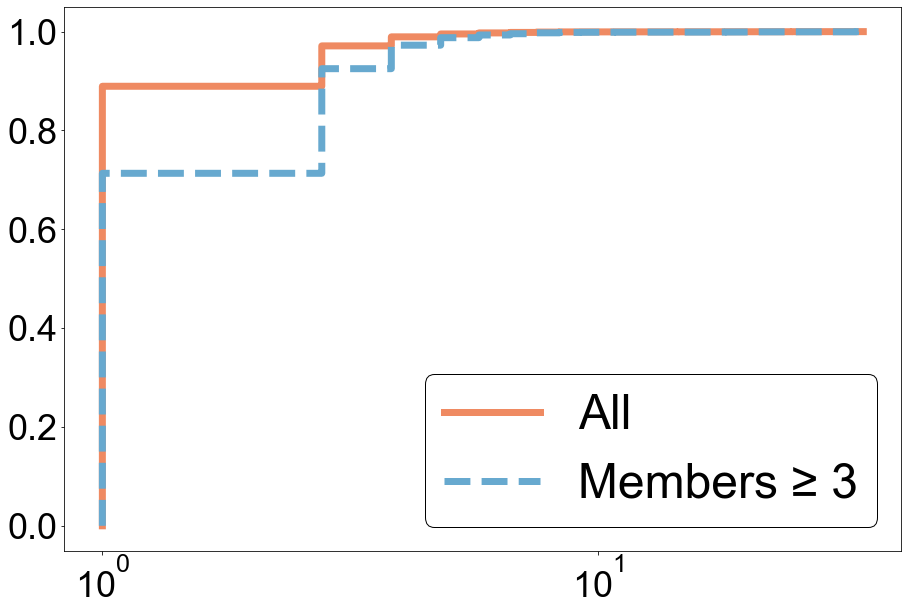

In [41]:
np_result_list5 = []
np_result_list5.append(np.array(subreddit_df['subreddits'].tolist()))

subreddits_3_number = []
for i in range(len(subreddit_df)):
    if subreddit_df.loc[i]['community_id'] in community_3_list:
        subreddits_3_number.append(subreddit_df.loc[i]['subreddits'])

np_result_list5.append(subreddits_3_number)

legends = ['All', 'Members ≥ 3']
draw_multiple_cdf_normalize_y(np_result_list5, "cdf_num_of_subreddit_by_community", colors, 'subreddit', legends, linestyles, True)

In [44]:
comments_tf_idf_df = pd.read_csv('tf_idf_similarity_comments_pair.csv')
posts_tf_idf_df = pd.read_csv('tf_idf_similarity_post_contents_pair.csv')



In [32]:
print(comments_tf_idf_df)

       parent_id1 comment_id1 parent_id2 comment_id2  tf-idf_similarity
0          112354     c6irl1u     ab42bx     ecxd281           0.075084
1          112354     c6irl1u     b9hq37     ek4ufjx           0.190092
2          112354     c6irl1u     1zair5     cfsdnqg           0.059605
3          112354     c6irl1u     8x4657     e20p9d1           0.206337
4          112354     c6irl1u     653701     dg75hps           0.022799
...           ...         ...        ...         ...                ...
388516     7nlzxy     ds2r6lj     ahklz6     eefe734           0.275530
388517     7nlzxy     ds2r6lj     btwyps     ep3x0c2           0.300978
388518     3y524a     cyalqpt     ahklz6     eefe734           0.027175
388519     3y524a     cyalqpt     btwyps     ep3x0c2           0.021051
388520     ahklz6     eefe734     btwyps     ep3x0c2           0.177697

[388521 rows x 5 columns]


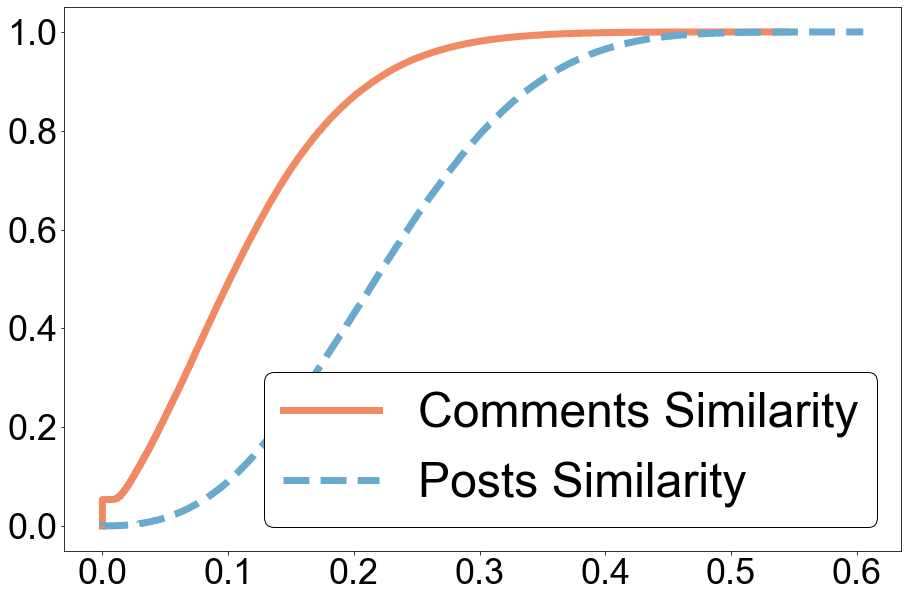

In [45]:
colors = ['#ef8a62', '#67a9cf']
linestyles = ['-', '--']

tf_idf_list = []
tf_idf_list.append(np.array(comments_tf_idf_df['tf-idf_similarity'].tolist()))
tf_idf_list.append(np.array(posts_tf_idf_df['tf-idf_similarity'].tolist()))
legends = ['Comments Similarity', 'Posts Similarity']

draw_multiple_cdf_normalize_y(tf_idf_list, 'satisfaction_similarity', colors, 'Similarity', legends, linestyles, False)

In [46]:
for tf_idf in tf_idf_list:
    sorted_tf_idf = np.sort(tf_idf)
    print(sorted_tf_idf[len(sorted_tf_idf) // 2])

0.1016043857145497
0.2175105303918816
